In [243]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
clinical_df = pd.read_csv(clinical_trial_data_to_load)
mousedrug_df = pd.read_csv(mouse_drug_data_to_load)

combined_data_df = pd.merge(clinical_df, mousedrug_df,
                                 how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [244]:
data_group_df = combined_data_df.groupby(['Drug', 'Timepoint'])

mean_volume_df = data_group_df.mean()


mean_vol_df = mean_volume_df.drop(["Metastatic Sites"], axis=1)
vol_df = mean_vol_df.reset_index()
vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [246]:
data_group_df = combined_data_df.groupby(['Drug', 'Timepoint'])

standard_error_df = data_group_df.sem()
sem_df = standard_error_df.drop(["Metastatic Sites", "Mouse ID"], axis=1)
sem_df.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [247]:
reformatted_df = vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
reformatted_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [248]:
# updated_df = reformatted_df.drop(["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"], axis=1)
# updated_df

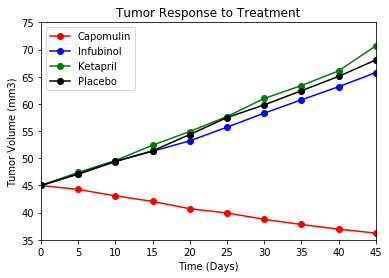

In [249]:
updated_df.plot(color=('red', 'blue', 'green', 'black'), marker=('o'), markersize=6)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='upper left')
plt.ylim(35, 75)
plt.show()

In [250]:
met_site_df = combined_data_df.groupby(['Drug', 'Metastatic Sites'])
met_site_df.head()

met_mean_df = met_site_df.mean()
met_mean_df.head()

Timepoint  Tumor Volume (mm3)
Drug      Metastatic Sites                               
Capomulin 0                 13.220339           42.098476
          1                 28.283582           39.479840
          2                 32.631579           39.639961
          3                 37.857143           33.761781
Ceftamin  0                  7.985075           47.888330

In [251]:
mean_volume_df.head()

met_df = mean_volume_df.drop(["Tumor Volume (mm3)"], axis=1)
reset_met_df = met_df.reset_index()
reset_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [252]:
data_group_df = combined_data_df.groupby(['Drug', 'Timepoint'])

met_sem_df = data_group_df.sem()
met_sites_sem_df = met_sem_df.drop(["Tumor Volume (mm3)", "Mouse ID"], axis=1)
small_met_df.head() 


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [263]:
# sem = reformat_sem_df.to_numpy()
# sem

In [254]:
reformat_met_df = reset_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
reformat_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [255]:
updated_met_df = reformat_met_df.drop(["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"], axis=1)
updated_met_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [256]:
reformat_sem_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


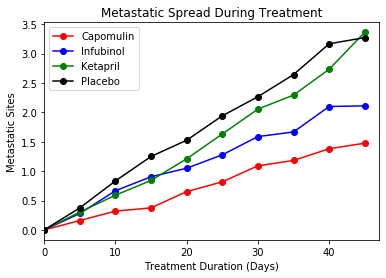

In [258]:
updated_met_df.plot(color=('red', 'blue', 'green', 'black'), marker=('o'), markersize=6)
yerror = 0.5
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc='upper left')
plt.xlim(0, 47)
# plt.errorbar(updated_met_df, updated_met_df, yerr=reformat_sem_df, xerr=None)
# plt.errorbar(reformat_sem_df.index, reformat_sem_df.values, yerr=reformat_sem_df['std'])
# plt.errorbar(updated_met_df.index, updated_met_df.values, yerr=yerror)

plt.show()

In [271]:
count_df = data_group_df.count()
mouse_count_df = count_df.drop(["Metastatic Sites", "Tumor Volume (mm3)"], axis=1)
reset_count_df = mouse_count_df.reset_index()
reset_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [308]:
reformat_count_df = reset_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
reformat_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [309]:
updated_count_df = reformat_count_df.drop(["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"], axis=1)
updated_count_df.head(40)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [310]:
updated_count_df["Capomulin Rate"] = updated_count_df["Capomulin"]/25*100 
updated_count_df["Infubinol Rate"] = updated_count_df["Infubinol"]/25*100 
updated_count_df["Ketapril Rate"] = updated_count_df["Ketapril"]/25*100 
updated_count_df["Placebo Rate"] = updated_count_df["Placebo"]/25*100 

In [311]:
survival_rate_df = updated_count_df.drop(["Placebo", "Capomulin", "Infubinol", "Ketapril"], axis=1)
survival_rate_df

Drug,Capomulin Rate,Infubinol Rate,Ketapril Rate,Placebo Rate
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


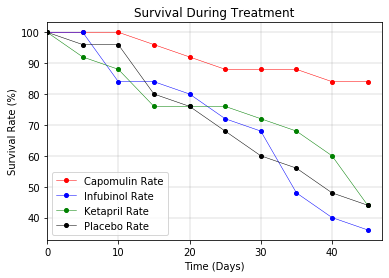

In [317]:
survival_rate_df.plot(color=('red', 'blue', 'green', 'black'), marker=('o'), markersize=4, linewidth=0.5)
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='bottom left')
plt.xlim(0, 47)
plt.show()